# UNDERSTAND DATASET


### IMPORT THƯ VIỆN

In [2]:
#IMPORT THƯ VIỆN
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from pathlib import Path

### IMPORT DATASET

In [3]:
#IMPORT DATASET
# Lấy đường dẫn của thư mục notebook hiện tại
BASE = Path().resolve()

# Tự động nối tới các thư mục con
master_path = BASE / "Dataset" / "MasterData"
sales_path  = BASE / "Dataset" / "Sales_snapshot_data"
inv_path    = BASE/ "Dataset" / "Inventory_snapshot_data"

#Đọc các file chính
retail_price = pd.read_csv(master_path / "Retail_price.csv")
cogs = pd.read_csv(master_path / "COGS.csv")
channel = pd.read_csv(master_path / "Distribution Channel.csv")
calendar = pd.read_csv(master_path / "Master_Calendar.csv")
product = pd.read_csv(master_path / "Productmaster.csv")
classification = pd.read_csv(master_path / "New_Core_Classification.csv")

# Các file ghi nhận bán hàng và tồn kho (nhiều file, chỉ đọc 1 file mẫu hoặc nối tất cả)
sales_files = list(sales_path.glob("*.csv"))
inventory_files = list(inv_path.glob("*.csv"))

sales_data = pd.concat([pd.read_csv(f) for f in sales_files], ignore_index=True)
inventory_data = pd.concat([pd.read_csv(f) for f in inventory_files], ignore_index=True)

## ĐỌC HIỂU DỮ LIỆU

### Dataset cho đề tài là InventoryAndSale_snapshot_data gồm 3 tập dữ liệu chính:
+ Masterdata: các trường dữ liệu nền về sản phẩm, kênh bán hàng, chi phí, và phân loại... (gồm 6 bảng database) cụ thể:
+ Sales: Chứa thông tin bán hàng (ghi nhận mỗi tháng = 1 file và từ 01/2022 đến 07/2023 --> 17 bảng database) --> DỮ LIỆU CHÍNH CHO MODEL
+ Inventory: Ghi nhận thông tin tồn kho mỗi cuối tháng (1 tháng = 1 file --> 12 bảng cho 12 tháng của 2022)

MÔ TẢ các tệp data = BẢNG GỒM: FIELD - DATA TYPE - DESCRIPTION

Dùng các lệnh sau để đọc được:
+ Field: các trường dữ liệu (cột) của mỗi bảng
+ Datatype: kiểu dữ liệu của mỗi field
+ Non-null count: Đếm số dòng không có giá trị NaN của mỗi field
+ Mô tả sơ lược: khái quát ý nghĩa của field (câu lệnh không áp dụng cho description này)

### Trong tập dữ liệu MasterData, ta KHÔNG thật sự cần 3 bảng sau, vì:
+ Master_calendar: chứa dữ liệu trong thời gian từ 2016-2020, trong khi đó bảng trung tâm "Sales" lại ghi nhận từ 2022-2023.

+ Retail_price: ghi nhận giá bán hàng của mỗi productID trong các khoảng thời gian khác nhau --> net_price trong bảng "Sales" đã đại diện cho giá trị này nên có thể bỏ qua

+ New_core_classification: để phân loại sản phẩm dòng Mới hay cũ --> dữ liệu không cần thiết với đề tài

In [4]:
#Retail_price: ghi nhận giá bán hàng của từng productID tại từng gia đoạn khác nhau
print(retail_price.info())
print(retail_price.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669460 entries, 0 to 669459
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  669460 non-null  int64 
 1   index       669460 non-null  int64 
 2   amount      669460 non-null  int64 
 3   valid_from  669460 non-null  object
 4   valid_to    669460 non-null  object
 5   product_id  669460 non-null  object
dtypes: int64(3), object(3)
memory usage: 30.6+ MB
None
   Unnamed: 0  index  amount  valid_from    valid_to  \
0           0      0  125000  01.01.2024  01.12.9999   
1           1      1  125000  01.01.2024  01.12.9999   
2           2      2  125000  01.01.2024  01.12.9999   
3           3      3  125000  01.01.2024  01.12.9999   
4           4      4  125000  01.01.2024  01.12.9999   

                              product_id  
0  f64e53d83cfa461abe156559d55ccae2DEN35  
1  c50a6b0caa0b4ca9af55cf27607b64d3DEN36  
2  408592eb75e44216a1f65e831f9a08e5DEN37

In [5]:
#New_core_classification: Phân loại sản phẩm theo dòng Core / New hoặc nhóm chiến lược sản phẩm.
print(classification.info())
print(classification.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150209 entries, 0 to 150208
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          150209 non-null  int64  
 1   index               150209 non-null  int64  
 2   lauch_season        128566 non-null  object 
 3   lauch_season_num    150193 non-null  float64
 4   sales_season        150193 non-null  object 
 5   sales_season_num    150193 non-null  float64
 6   final_status        122936 non-null  object 
 7   b2c_assortment      150193 non-null  float64
 8   b2b_assortment      150193 non-null  float64
 9   total_assortment    150193 non-null  float64
 10  product_syle_color  150176 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 12.6+ MB
None
   Unnamed: 0  index lauch_season  lauch_season_num sales_season  \
0           0      0          NaN               0.0         17DE   
1           1      1          NaN  

In [6]:
#MasterCalendar: Bảng quy đổi mã tuần (YearWeek) sang các thông tin thời gian như năm, tháng.
print(calendar.info())
print(calendar.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Year         260 non-null    int64 
 1   Month        260 non-null    int64 
 2   Month_3Char  260 non-null    int64 
 3   Week         260 non-null    int64 
 4   YearWeek     260 non-null    int64 
 5   Start Date   260 non-null    object
 6   End Date     260 non-null    object
 7   CNY          260 non-null    object
dtypes: int64(5), object(3)
memory usage: 16.4+ KB
None
   Year  Month  Month_3Char  Week  YearWeek  Start Date    End Date  CNY
0  2016      1            1     1    201601  2016-01-04  2016-01-10   No
1  2016      1            1     2    201602  2016-01-11  2016-01-17   No
2  2016      1            1     3    201603  2016-01-18  2016-01-24  Yes
3  2016      1            1     4    201604  2016-01-25  2016-01-31  Yes
4  2016      2            2     5    201605  2016-02-01  2016-02-

### 3 Bảng sau cần dùng cho model:

In [7]:
#COGS: Giá vốn hàng bán của từng sản phẩm. (Cost of Good Sold)
print(cogs.info())
print(cogs.head())
print("*"*100)
print("/Các field quan trọng cần dùng của bảng 'Distribution Channel': `amount`, `product_id`")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522675 entries, 0 to 522674
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   index       522675 non-null  int64 
 1   amount      522675 non-null  int64 
 2   valid_from  522675 non-null  object
 3   valid_to    522675 non-null  object
 4   product_id  522675 non-null  object
dtypes: int64(2), object(3)
memory usage: 19.9+ MB
None
   index  amount  valid_from    valid_to  \
0      0   50000  23.12.2021  31.01.2023   
1      1   50000  23.12.2021  31.01.2023   
2      2  479400  01.01.2023  07.02.2023   
3      3  479400  01.01.2023  07.02.2023   
4      4  479400  01.01.2023  07.02.2023   

                              product_id  
0  904de55fb0ca414cb86b2e466c9d74c1OOO00  
1  904de55fb0ca414cb86b2e466c9d74c1OOO00  
2  9e8ecc5d2b104d609e3b53c4724bc96aCAM39  
3  9225ed5b408343be98a4dc63d4027a26CAM40  
4  d1410b40bb004d1f9b2c2619d2c933f6CAM41  
************************

In [8]:
#Distribution_Channel: Danh mục kênh phân phối và thông tin cửa hàng (site).
print(channel.info())
print(channel.head())
print("*"*100)
print("/Các field quan trọng cần dùng của bảng 'Distribution Channel': 'site_store', `region`, `store_type`, `urbanization`, `b2b_b2c`, `channel_id'")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3405 entries, 0 to 3404
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      3405 non-null   int64 
 1   index           3405 non-null   int64 
 2   site_store      3405 non-null   int64 
 3   b2b_b2c         3405 non-null   object
 4   channel_id      3405 non-null   object
 5   region          3405 non-null   object
 6   city_level      3405 non-null   object
 7   store_concept   3403 non-null   object
 8   trade_term      3405 non-null   object
 9   area_range      464 non-null    object
 10  store_type      3405 non-null   object
 11  urbanization    3405 non-null   object
 12  branch_area     3405 non-null   object
 13  address_2       3403 non-null   object
 14  address_3       3403 non-null   object
 15  showroom_area   470 non-null    object
 16  warehouse_area  456 non-null    object
 17  start_month     3376 non-null   object
 18  start_ye

In [9]:
#Productmaster: Danh sách chi tiết từng sản phẩm (SKU) của doanh nghiệp.
print(product.info())
print(product.head())
print("*"*100)
print("/Các field quan trọng cần dùng của bảng 'Productmaster':`product_id`, `product_group`, `brand_name`, `price_group`, `listing_price`")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94867 entries, 0 to 94866
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            94867 non-null  int64  
 1   index                 94867 non-null  int64  
 2   color                 94822 non-null  object 
 3   color_group           94867 non-null  object 
 4   listing_price         94840 non-null  float64
 5   price_group           94840 non-null  object 
 6   gender                94867 non-null  object 
 7   product_group         94867 non-null  object 
 8   detail_product_group  94867 non-null  object 
 9   shoe_product          94867 non-null  object 
 10  size_group            94867 non-null  object 
 11  size                  94722 non-null  float64
 12  age_group             94867 non-null  object 
 13  activity_group        94867 non-null  object 
 14  image_copyright       94867 non-null  object 
 15  lifestyle_group    

### Và Không cần dùng tập dữ liệu Inventory cho model vì:
Các ghi nhận hàng tồn kho diễn ra trong 12 tháng 2022 mà bảng trung tâm "Sales" lại ghi nhận từ 01/2022 đến 07/2023 --> Inventory không đáp đủ dữ liệu trong thời gian của Sales (đồng thời dữ liệu về tồn kho không thật sự cần thiết cho đề tài)

In [10]:
#Inventory: Ghi nhận thông tin tồn kho mỗi cuối tháng (1 tháng = 1 file --> 12 bảng cho 12 tháng của 2022)
print(inventory_data.info())
print(inventory_data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1367080 entries, 0 to 1367079
Data columns (total 9 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   Unnamed: 0          1367080 non-null  int64 
 1   index               1367080 non-null  int64 
 2   plant               1367080 non-null  int64 
 3   calendar_year       1367080 non-null  int64 
 4   calendar_yeer_week  1367080 non-null  int64 
 5   sloc                1367080 non-null  object
 6   quantity            1367080 non-null  int64 
 7   total_amount        1367080 non-null  int64 
 8   product_id          1367080 non-null  object
dtypes: int64(7), object(2)
memory usage: 93.9+ MB
None
   Unnamed: 0  index  plant  calendar_year  calendar_yeer_week  sloc  \
0           0      0   1201           2022            20220228  3000   
1           1      1   1201           2022            20220228  3000   
2           2      2   1201           2022            20220228  30

### Bảng Sales được gộp từ các ghi nhận 01/2022-07/2023 là bảng trung tâm (quan trọng nhất):

In [11]:
# Sales: Chứa thông tin bán hàng (ghi nhận mỗi tháng = 1 file và từ 01/2022 đến 07/2023 --> 17 bảng database)
#--> DỮ LIỆU CHÍNH CHO MODEL
print(sales_data.info())
print(sales_data.head())
print("*"*100)
print("/2 field là `distribution_channel` và `customer_id` cot hể lượt bỏ vì không cần thiết cho model")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 831966 entries, 0 to 831965
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   month                      831966 non-null  int64 
 1   week                       831966 non-null  int64 
 2   site                       831966 non-null  int64 
 3   branch_id                  831966 non-null  int64 
 4   channel_id                 831966 non-null  object
 5   distribution_channel       831966 non-null  object
 6   distribution_channel_code  831966 non-null  object
 7   sold_quantity              831966 non-null  int64 
 8   cost_price                 831966 non-null  int64 
 9   net_price                  831966 non-null  int64 
 10  customer_id                831965 non-null  object
 11  product_id                 831966 non-null  object
dtypes: int64(7), object(5)
memory usage: 76.2+ MB
None
     month    week  site  branch_id channel_id di

## CÁC TRƯỜNG CỐT LÕI CỦA MODEL

| **Nhóm biến**                        | **Biến cụ thể**                                                             | **Nguồn bảng**            | **Vai trò trong mô hình**                                                              |
| ------------------------------------ | --------------------------------------------------------------------------- | ------------------------- | --------------------------------------------------------------------------------------------- |
| **Địa điểm + Kênh bán (Region / Channel)**        | `region`, `store_type`, `urbanization`, `b2b_b2c`, `channel_id`                                      | `Distribution Channel`    | Đặc trưng khu vực và mức độ đô thị hoá – ảnh hưởng hành vi tiêu dùng. Phân biệt hành vi mua giữa B2B và B2C, ảnh hưởng độ nhạy giá.                         |
| **Sản phẩm (Product)**               | `product_id`, `product_group`, `brand_name`, `price_group`, `listing_price`| `Productmaster`           | Đặc trưng sản phẩm, phân loại giá và thương hiệu – nền tảng chính để dự báo nhu cầu theo SKU. |
| **Giá & doanh số (Pricing & Sales)** | `sold_quantity`, `net_price`, `cost_price`,  `month`, `week`                                   | `Sales_snapshot_data`     | Thông tin bán hàng thực tế – biến đầu vào chính cho dự báo.                                   |
| **Giá vốn chuẩn (Standard Cost)**    | `cost_std`                                                                  | `COGS`                    | Dùng để phân tích độ lệch giữa giá vốn thực tế và giá vốn kế hoạch.                           |
| **Tổng hợp (Derived Features)**      | `revenue`, `profit`, `gross_margin`, `discount_rate` (dự tính áp dụng)                       | Tính toán từ các biến gốc | Biến phản ánh hiệu quả kinh doanh, dùng để kiểm định và huấn luyện mô hình.                   |


--> Với mỗi nhóm biến (field) ta sẽ ứng dụng cho từng mục đích nhỏ trong việc xây dựng mô hình của đề tài

==> 3 bảng thuộc MasterData (COGS, ProductMasster và DistributionChannel) và bảng Sales là 4 bảng chính chúng ta cần phân tích


## ĐỌC LẠI DỮ LIỆU 4 BẢNG VỚI CÁC FIELD CẦN THIẾT

In [12]:
# === Đọc lại tập dữ liệu sale với những field cần thiết ===
sales_data = sales_data[['week', 'month', 'site','branch_id', 'channel_id','distribution_channel_code', 'sold_quantity', 'net_price', 'cost_price', 'product_id']]
print("Sales:", sales_data.shape) # ==> ĐÂY LÀ BẢNG TRUNG TÂM, loại bỏ 'channel_distribution' và 'custumer_id'


# === Đọc Product, Channel & COGS ===
product = product[['product_id', 'product_group', 'brand_name', 'price_group', 'listing_price']]
print("products: ", product.shape)

cogs = cogs[['product_id', 'amount']]
print("cogs: ", cogs.shape)

channel = channel[['site_store', 'region', 'store_type', 'urbanization', 'b2b_b2c']]
print("channel: ", channel.shape)

Sales: (831966, 10)
products:  (94867, 5)
cogs:  (522675, 2)
channel:  (3405, 5)


In [13]:
def check_negative_ratio(df, column):
    """
    Đếm số lượng và tỷ lệ phần trăm giá trị âm trong một cột cụ thể.
    """
    total = len(df)
    negative_count = (df[column] < 0).sum()
    ratio = (negative_count / total) * 100 if total > 0 else 0

    print(f"Cột '{column}': có {negative_count} giá trị âm ({ratio:.2f}% trong tổng {total} dòng).")

    return negative_count, ratio

# Gọi hàm cho bảng sales_data
check_negative_ratio(sales_data, 'sold_quantity')


Cột 'sold_quantity': có 26432 giá trị âm (3.18% trong tổng 831966 dòng).


(np.int64(26432), np.float64(3.177052908412123))

### Thống kê mô tả nhanh các đặc trưng của các bảng sau

In [14]:
print("Bảng Sales: ")
print(sales_data.describe(include=[float, int])) #mô tả các cột số numeric
print("\n \n Bảng Product: ")
print(product.describe(include=[float, int])) #mô tả các cột số numeric
print("\n Bảng COGS: ")
print(cogs.describe(include=[float, int]))#mô tả các cột số numeric
print("\n Bảng Channel: ")
print(channel.describe(include=[float, int])) #mô tả các cột số numeric




Bảng Sales: 
                week         month           site      branch_id  \
count  831966.000000  8.319660e+05  831966.000000  831966.000000   
mean   202252.805829  2.022310e+06    1283.890859    1265.760139   
std        43.837871  4.588165e+02     214.917423     220.033499   
min    202153.000000  2.022001e+06    1100.000000    1100.000000   
25%    202218.000000  2.022005e+06    1118.000000    1100.000000   
50%    202237.000000  2.022009e+06    1200.000000    1200.000000   
75%    202303.000000  2.023001e+06    1503.000000    1500.000000   
max    202352.000000  2.023007e+06    2001.000000    2000.000000   

       sold_quantity     net_price    cost_price  
count  831966.000000  8.319660e+05  8.319660e+05  
mean        1.411734  3.993313e+05  3.055058e+05  
std         3.262691  6.886876e+05  6.034099e+05  
min       -47.000000 -2.302845e+07 -2.184840e+07  
25%         1.000000  1.594260e+05  1.190000e+05  
50%         1.000000  2.900000e+05  2.069680e+05  
75%         1.000

## Kiểm tra kiểu dữ liệu và giá trị âm của các field

In [15]:
import numpy as np

def check_dtype_and_negative(df, name="DataFrame"):
    print(f"\nKiểm tra dữ liệu trong bảng: {name}")
    print("-" * 60)

    #  Kiểm tra kiểu dữ liệu không đồng nhất
    for col in df.columns:
        types = df[col].map(type).unique()
        if len(types) > 1:
            print(f"Cột '{col}' có nhiều kiểu dữ liệu: {types}")

    # Kiểm tra cột số bị đọc sai kiểu object
    print("\n Cột kiểu object nghi ngờ chứa giá trị số:")
    for col in df.columns:
        if df[col].dtype == 'object':
            # bỏ qua chuỗi chỉ chứa ký tự hợp lệ cho số
            non_numeric = df[col].astype(str).str.contains(r'[^0-9.\-]', na=False).sum()
            if non_numeric == 0 and df[col].nunique() > 5:
                print(f"  '{col}' có vẻ là số nhưng bị đọc thành object.")

    # Kiểm tra giá trị âm bất thường trong cột số
    print("\n Cột có giá trị âm bất thường:")
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        neg_count = (df[col] < 0).sum()
        if neg_count > 0:
            min_val = df[col].min()
            print(f" {col}: {neg_count} giá trị âm (min = {min_val})")

    print("-" * 60)

check_dtype_and_negative(cogs, "COGS")
check_dtype_and_negative(product, "Product")
check_dtype_and_negative(channel, "Channel")
check_dtype_and_negative(sales_data, "Sales")



Kiểm tra dữ liệu trong bảng: COGS
------------------------------------------------------------

 Cột kiểu object nghi ngờ chứa giá trị số:

 Cột có giá trị âm bất thường:
------------------------------------------------------------

Kiểm tra dữ liệu trong bảng: Product
------------------------------------------------------------
Cột 'price_group' có nhiều kiểu dữ liệu: [<class 'str'> <class 'float'>]

 Cột kiểu object nghi ngờ chứa giá trị số:

 Cột có giá trị âm bất thường:
------------------------------------------------------------

Kiểm tra dữ liệu trong bảng: Channel
------------------------------------------------------------

 Cột kiểu object nghi ngờ chứa giá trị số:

 Cột có giá trị âm bất thường:
------------------------------------------------------------

Kiểm tra dữ liệu trong bảng: Sales
------------------------------------------------------------

 Cột kiểu object nghi ngờ chứa giá trị số:

 Cột có giá trị âm bất thường:
 sold_quantity: 26432 giá trị âm (min = -47)
 net

### Bảng Product có 'price_group' chứa 2 kiểu dữ liệu:
--> Hoàn toàn bình thường và hợp lệ vì nó chia group theo khoảng giá nên có dấu so sánh
--> không cần phải xử lý

### Bảng Sales có giá trị âm ở sold_quantity và các cột giá:
--> Ta loại bỏ các dòng có 'sold_quantity' âm vì model không xét tới các trường hợp hoàn trả hay chiết khấu


In [16]:
print("Số dòng trước khi loại bỏ giá trị âm: ",sales_data.shape)
# Loại bỏ các dòng có sold_quantity âm
sales_data = sales_data[sales_data['sold_quantity'] >= 0]

# Kiểm tra lại sau khi loại bỏ
print("Số dòng còn lại:", sales_data.shape)
print("Còn giá trị âm không?", (sales_data['sold_quantity'] < 0).sum())


Số dòng trước khi loại bỏ giá trị âm:  (831966, 10)
Số dòng còn lại: (805534, 10)
Còn giá trị âm không? 0


# CLEAN CODE

## Kiểm tra giá trị thiếu (Missing Values) + xử lí

In [17]:
print("Kiểm tra missing value của bảng Sales:\n", sales_data.isnull().sum())
print("\nKiểm tra missing value của bảng Product:\n",product.isnull().sum())
print("\nKiểm tra missing value của bảng Channel:\n", channel.isnull().sum())
print("\nKiểm tra missing value của bảng COGS:\n", cogs.isnull().sum())



Kiểm tra missing value của bảng Sales:
 week                         0
month                        0
site                         0
branch_id                    0
channel_id                   0
distribution_channel_code    0
sold_quantity                0
net_price                    0
cost_price                   0
product_id                   0
dtype: int64

Kiểm tra missing value của bảng Product:
 product_id        0
product_group     0
brand_name        0
price_group      27
listing_price    27
dtype: int64

Kiểm tra missing value của bảng Channel:
 site_store      0
region          0
store_type      0
urbanization    0
b2b_b2c         0
dtype: int64

Kiểm tra missing value của bảng COGS:
 product_id    0
amount        0
dtype: int64


### Sau khi kiểm tra Missing value ta cần xử lý bảng Product

<Axes: >

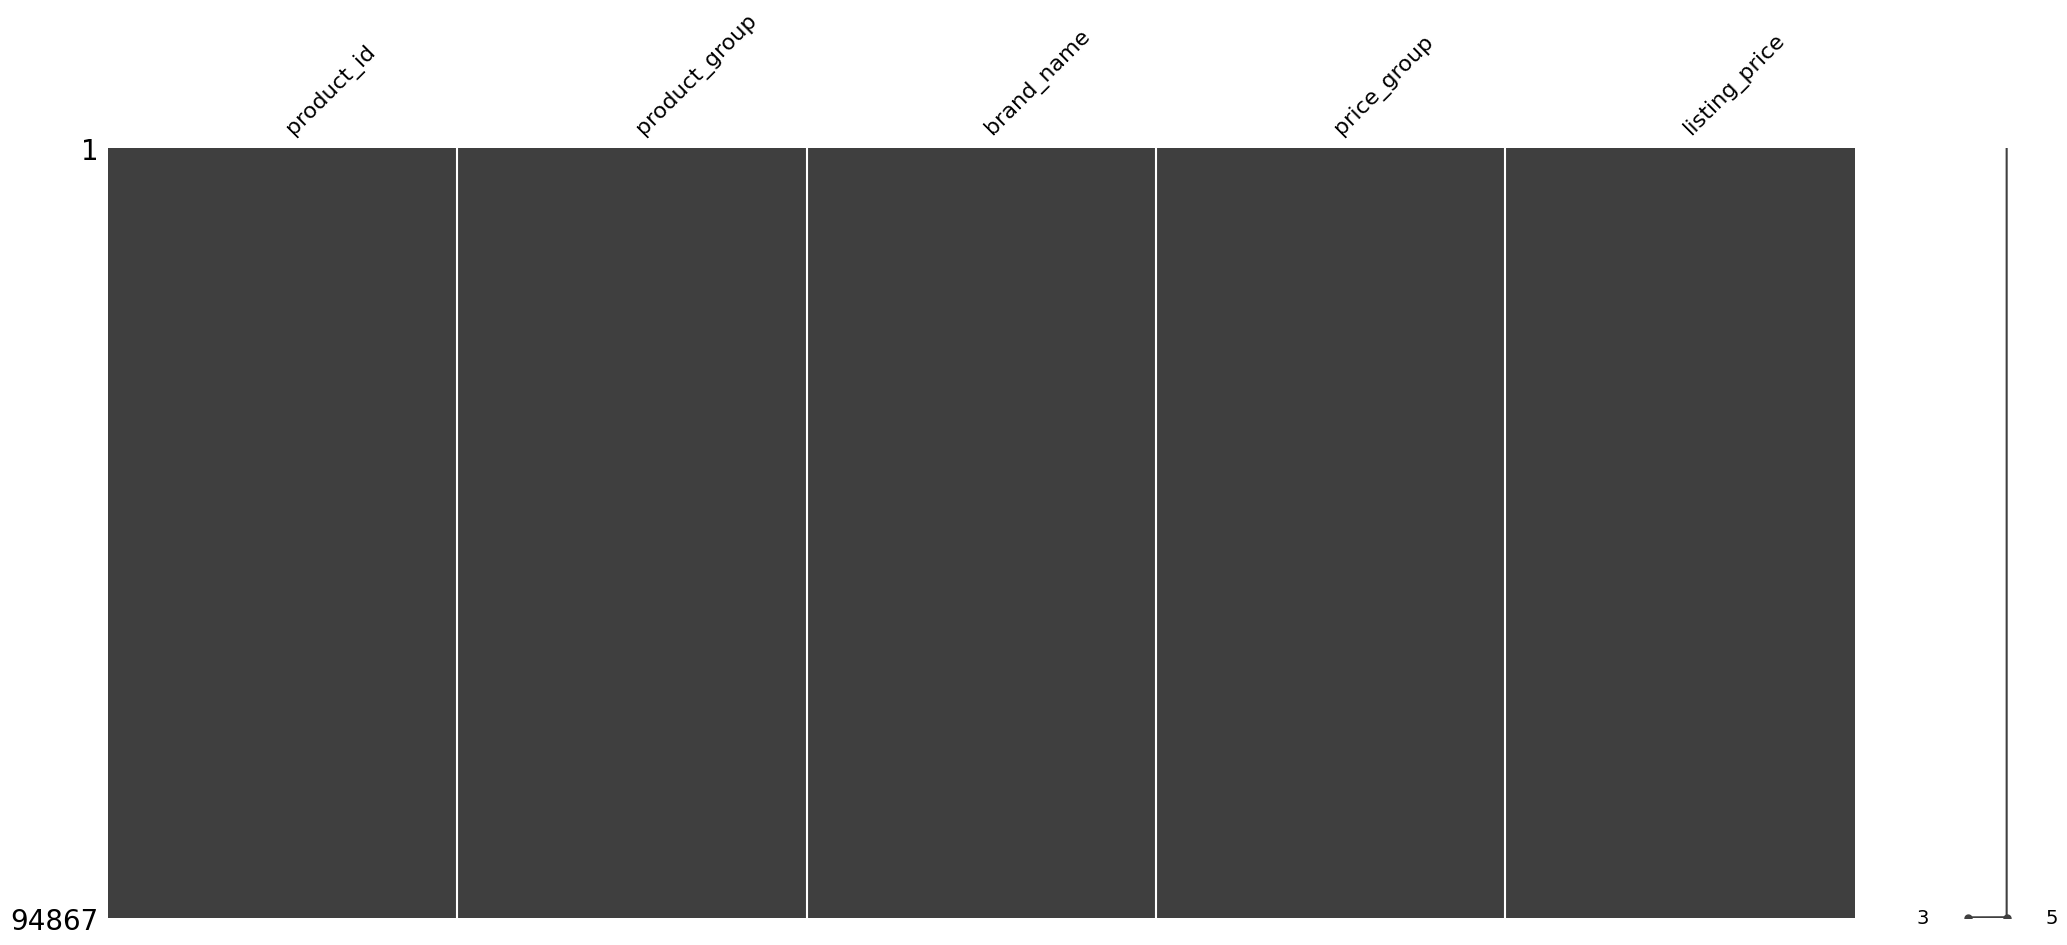

In [ ]:
msno.matrix(product)

In [18]:
#Thay thế Na vào các giá trị còn trống
product.fillna({
    'price_group': 'Unknown',     # nhóm giá bị thiếu
}, inplace=True)
# loại bỏ các dòng còn lại có nhiều NA
product.dropna(inplace=True)

#Với giá trị số, ta dùng 0 vì có thể hiểu là “chưa có dữ liệu”
product.fillna({
    'listing_price': 0,     # giá niêm yết chưa có → 0
}, inplace=True)

In [19]:
#check null after handling
product.isnull().sum()

product_id       0
product_group    0
brand_name       0
price_group      0
listing_price    0
dtype: int64

### DROP DUPLICATE

In [20]:
# Danh sách các bảng cần xử lý
datasets = {
    'product': product,
    'cogs': cogs,
    'channel': channel,
    'sales_data': sales_data
}

for name, df in datasets.items():
    print(f"\n Kiểm tra bảng: {name}")
    before = len(df)
    dup_count = df.duplicated().sum()  # số lượng dòng trùng hoàn toàn

    if dup_count > 0:
        print(f" Phát hiện {dup_count} dòng trùng lặp hoàn toàn.")
        df.drop_duplicates(inplace=True, keep='first')  # xóa trùng toàn bộ cột
        after = len(df)
        print(f"Đã xoá {before - after} dòng trùng lặp. Còn lại: {after} dòng.")
    else:
        print(f"Không có dòng trùng lặp trong bảng {name}.")



 Kiểm tra bảng: product
Không có dòng trùng lặp trong bảng product.

 Kiểm tra bảng: cogs
 Phát hiện 266756 dòng trùng lặp hoàn toàn.
Đã xoá 266756 dòng trùng lặp. Còn lại: 255919 dòng.

 Kiểm tra bảng: channel
 Phát hiện 238 dòng trùng lặp hoàn toàn.
Đã xoá 238 dòng trùng lặp. Còn lại: 3167 dòng.

 Kiểm tra bảng: sales_data
 Phát hiện 22059 dòng trùng lặp hoàn toàn.
Đã xoá 22059 dòng trùng lặp. Còn lại: 783475 dòng.


In [21]:
print("Bảng cogs \n")
print(cogs.head())
print("\n bảng product")
print(product.head())
print("\n bảng channel")
print(channel.head())
print("\n bảng sales")
print(sales_data.head())

Bảng cogs 

                              product_id  amount
0  904de55fb0ca414cb86b2e466c9d74c1OOO00   50000
2  9e8ecc5d2b104d609e3b53c4724bc96aCAM39  479400
3  9225ed5b408343be98a4dc63d4027a26CAM40  479400
4  d1410b40bb004d1f9b2c2619d2c933f6CAM41  479400
5  81f0a5c55afa4407897b0890f5cc904fCAM42  479400

 bảng product
                              product_id product_group brand_name price_group  \
0  80e1107e5bf74598baffea3a7b6073c5DEN38           SAN     Brand1     200<300   
1  c8223e6133a64491a006dc0f95c2bfd9DEN39           SAN     Brand1     200<300   
2  bec30e131ee04e49a4c87bc56f135b13DEN40           SAN     Brand1     200<300   
3  3f4e265b0ac740e9b9edfd23e0ba1ca5DEN41           SAN     Brand1     200<300   
4  53e6284597944ec787e002b631391210DEN42           SAN     Brand1     200<300   

   listing_price  
0       255273.0  
1       255273.0  
2       255273.0  
3       255273.0  
4       255273.0  

 bảng channel
   site_store region store_type urbanization b2b_b2c
0    60000

### DEAL WITH OUTLIERS

In [24]:
def handle_outliers(df, df_name, numeric_cols=None):
    """
    Xử lý outlier nhẹ:
    - Không loại bỏ dữ liệu nhiều
    - Giới hạn bằng winsorize (theo percentile)
    - Không loại nếu chỉ chiếm < 1%
    """
    print(f"\nXử lý outlier nhẹ cho bảng: {df_name}")
    df_clean = df.copy()

    if numeric_cols is None:
        numeric_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()

    for col in numeric_cols:
        before = len(df_clean)

        # Loại giá trị âm (đã làm trước đó, chỉ đề phòng thôi)
        df_clean = df_clean[df_clean[col] >= 0]

        # Tính ngưỡng dựa theo percentile (nhẹ hơn IQR)
        lower = df_clean[col].quantile(0.005)
        upper = df_clean[col].quantile(0.995)

        outliers = ((df_clean[col] < lower) | (df_clean[col] > upper)).sum()
        ratio = outliers / len(df_clean)

        if ratio > 0.02:  # nếu >2% dữ liệu là outlier thì chỉ giới hạn
            df_clean[col] = np.clip(df_clean[col], lower, upper)
            action = "giới hạn giá trị (winsorize)"
        else:
            df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
            action = "loại bỏ nhẹ"

        after = len(df_clean)
        print(f"{col}: {outliers} outlier ({action}), còn lại {after}/{before} dòng")

    print(f"Hoàn tất xử lý nhẹ cho {df_name}, còn lại {len(df_clean)} dòng.")
    return df_clean
# Áp dụng cho từng bảng
cogs_clean = handle_outliers(cogs, "COGS", numeric_cols=['amount'])
product_clean = handle_outliers(product, "PRODUCT", numeric_cols=['listing_price'])
channel_clean = handle_outliers(channel, "CHANNEL", numeric_cols=[])  # không có biến số
sales_clean = handle_outliers(sales_data, "SALES", numeric_cols=['sold_quantity', 'cost_price', 'net_price'])

# Lưu file kết quả
cogs_clean.to_csv("Dataset/preprocess/COGS_clean.csv", index=False, encoding="utf-8-sig")
product_clean.to_csv("Dataset/preprocess/Product_clean.csv", index=False, encoding="utf-8-sig")
channel_clean.to_csv("Dataset/preprocess/Channel_clean.csv", index=False, encoding="utf-8-sig")
sales_clean.to_csv("Dataset/preprocess/Sales_clean.csv", index=False, encoding="utf-8-sig")

print("\nĐã lưu toàn bộ các bảng vào thư mục preprocess sau khi xử lý outlier.")


Xử lý outlier nhẹ cho bảng: COGS
amount: 2522 outlier (loại bỏ nhẹ), còn lại 253397/255919 dòng
Hoàn tất xử lý nhẹ cho COGS, còn lại 253397 dòng.

Xử lý outlier nhẹ cho bảng: PRODUCT
listing_price: 532 outlier (loại bỏ nhẹ), còn lại 94308/94840 dòng
Hoàn tất xử lý nhẹ cho PRODUCT, còn lại 94308 dòng.

Xử lý outlier nhẹ cho bảng: CHANNEL
Hoàn tất xử lý nhẹ cho CHANNEL, còn lại 3167 dòng.

Xử lý outlier nhẹ cho bảng: SALES
sold_quantity: 3450 outlier (loại bỏ nhẹ), còn lại 780025/783475 dòng
cost_price: 7562 outlier (loại bỏ nhẹ), còn lại 772463/780025 dòng
net_price: 7547 outlier (loại bỏ nhẹ), còn lại 764916/772463 dòng
Hoàn tất xử lý nhẹ cho SALES, còn lại 764916 dòng.

Đã lưu toàn bộ các bảng vào thư mục preprocess sau khi xử lý outlier.


------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------------

# TỪ KHÚC DƯỚI NÀY TÔI XỬ LÍ ĐẸP LẠI SAU NHE
CHECK XEM DATA SAU KHI PHÂN TÍCH VÀ XỬ LÍ MISSING VALUE VỚI OUTLIER OKE CHUA HOI

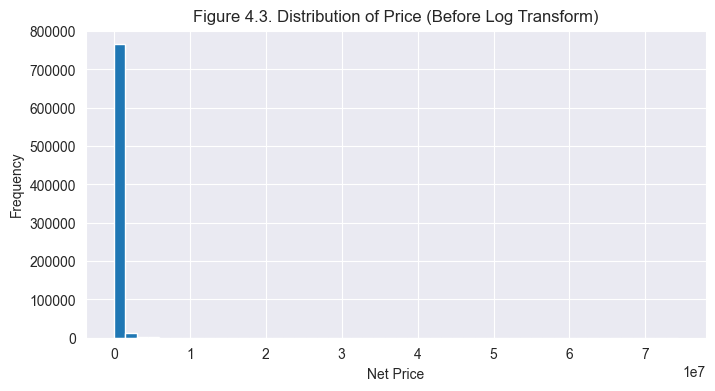

In [25]:
# Vẽ histogram để xem phân bố giá
df['net_price'].hist(bins=50, figsize=(8,4))
plt.title("Figure 4.3. Distribution of Price (Before Log Transform)")
plt.xlabel("Net Price")
plt.ylabel("Frequency")
plt.show()

In [ ]:
df.shape

(783475, 10)

## Nhận diện các outlier qua box plot và histogram

In [26]:
import matplotlib.pyplot as plt

# Chọn các cột định lượng quan trọng
num_cols = ['sold_quantity', 'net_price', 'listing_price', 'cost_price', 'revenue', 'profit', 'discount_rate']

plt.figure(figsize=(14, 8))
df[num_cols].boxplot()
plt.title("Phân bố dữ liệu và Outlier của các biến định lượng")
plt.ylabel("Giá trị")
plt.xticks(rotation=30)
plt.show()


KeyError: "['listing_price', 'revenue', 'profit', 'discount_rate'] not in index"

<Figure size 1400x800 with 0 Axes>

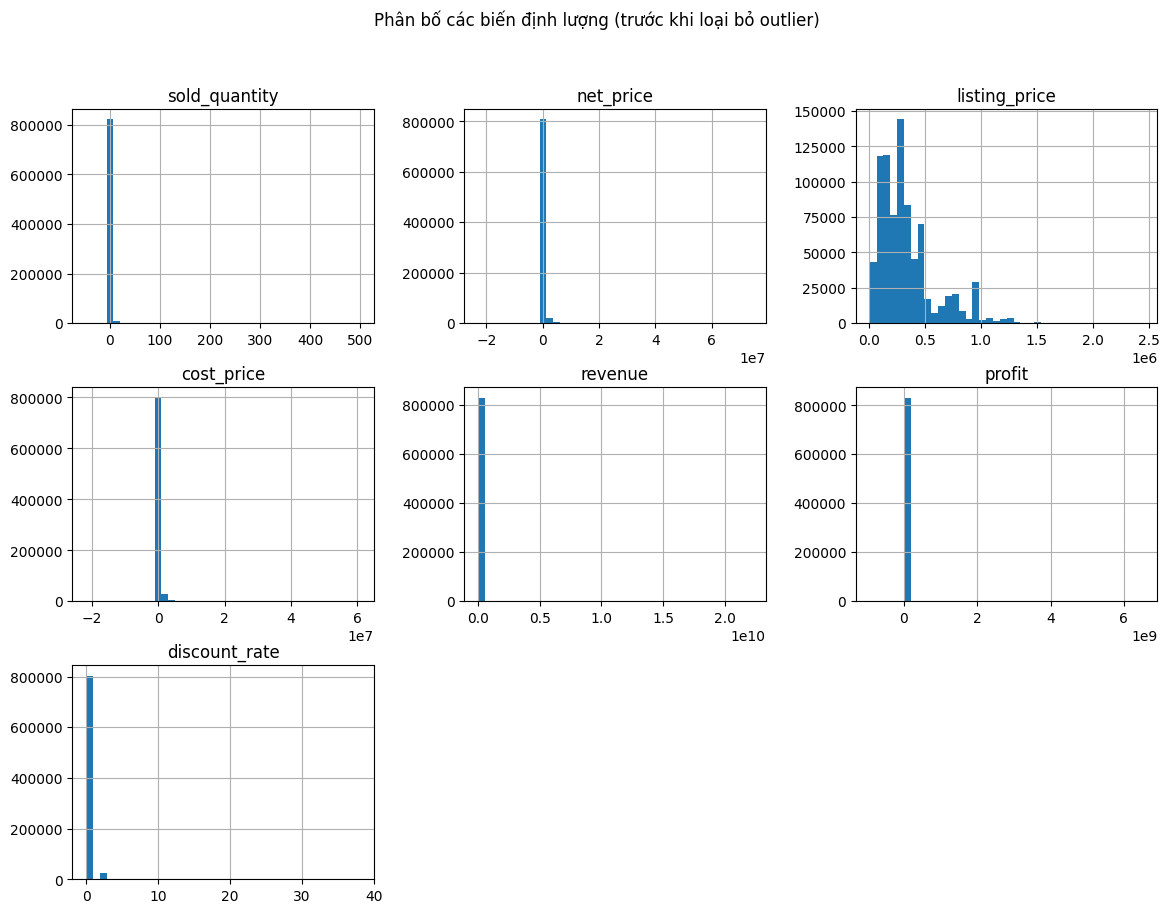

In [ ]:
df[num_cols].hist(figsize=(14,10), bins=40)
plt.suptitle("Phân bố các biến định lượng (trước khi loại bỏ outlier)")
plt.show()


In [ ]:
def remove_outliers_iqr(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        before = len(df)
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        after = len(df)
        print(f"{col}: {before - after} dòng bị loại ({round((before - after)/before*100,2)}%)")
    return df


# Áp dụng cho các biến định lượng chính
cols_iqr = ['sold_quantity', 'net_price', 'listing_price', 'revenue', 'profit']
df_clean = remove_outliers_iqr(df, cols_iqr)

sold_quantity: 144235 dòng bị loại (17.34%)
net_price: 42999 dòng bị loại (6.25%)
listing_price: 24038 dòng bị loại (3.73%)
revenue: 14502 dòng bị loại (2.34%)
profit: 1744 dòng bị loại (0.29%)


In [ ]:
df_clean['discount_rate'] = df_clean['discount_rate'].clip(lower=0, upper=1)
df_clean['gross_margin'] = df_clean['gross_margin'].clip(lower=-0.2, upper=1)

In [ ]:
print("Sau khi xử lý:", df_clean.shape)
df_clean.describe()

Sau khi xử lý: (604438, 23)


,month,week,site,sold_quantity,cost_price,net_price,listing_price,cost_std,year,week_in_year,month_in_year,revenue,profit,gross_margin,discount_rate
count,6.044380e+05,604438.000000,604438.000000,604438.0,604438.000000,604438.000000,604438.000000,6.044380e+05,604438.000000,604438.000000,604438.000000,604438.000000,604438.000000,604438.000000,604438.000000
mean,2.022311e+06,202252.741960,1286.689482,1.0,184984.133311,259904.726523,262402.369441,1.888223e+05,2022.299816,22.760391,5.611644,259904.726523,74920.593212,0.280930,0.050765
std,4.595540e+02,44.056197,211.158361,0.0,99580.175992,142966.642495,146208.891679,1.018146e+05,0.470948,15.126930,3.451957,142966.642495,49770.207525,0.087229,0.088340
min,2.022001e+06,202153.000000,1100.000000,1.0,4550.000000,0.000000,6500.000000,4.550000e+03,2021.000000,1.000000,1.000000,0.000000,-88400.000000,-0.200000,0.000000
25%,2.022005e+06,202218.000000,1121.000000,1.0,110160.000000,144000.000000,147273.000000,1.110667e+05,2022.000000,9.000000,3.000000,144000.000000,30720.000000,0.307636,0.000000
50%,2.022009e+06,202236.000000,1200.000000,1.0,186938.000000,250000.000000,260182.000000,1.915333e+05,2022.000000,22.000000,5.000000,250000.000000,64000.000000,0.320000,0.000579
75%,2.023001e+06,202303.000000,1505.000000,1.0,250364.000000,355000.000000,358364.000000,2.550000e+05,2023.000000,34.000000,8.000000,355000.000000,110328.000000,0.320000,0.066138
max,2.023007e+06,202352.000000,2001.000000,1.0,699720.000000,692000.000000,736364.000000,1.239380e+06,2023.000000,53.000000,12.000000,692000.000000,229540.000000,0.511964,1.000000


In [ ]:
df.sample(3)

,month,week,site,sold_quantity,cost_price,net_price,product_id,listing_price,price_group,product_group,...,region,store_type,urbanization,year,week_in_year,month_in_year,revenue,profit,gross_margin,discount_rate
401659,2023005,202320,1512,1,70720,104000,b1535a371c0f4f339c896446b5a99c29XNH37,102109.0,100<200,DEP,...,KVMT,Độc lập,Nội thành,2023,20,5,104000.0,33280.0,0.320000,0.000000
617217,2022008,202235,1604,1,201027,278000,d78f8e015288485398648dfa43587e21CAM33,328909.0,300<600,SAN,...,KVTN,Độc lập,Nội thành,2022,35,8,278000.0,76973.0,0.276881,0.154781
663997,2022009,202237,1800,4,2267292,3150872,a8012542810c4208a319d1e4dea10050XAM37,794291.0,600<900,GIA,...,Khác,Online,Khác,2022,37,9,12603488.0,3534320.0,0.280424,0.000000


In [ ]:
df_clean.sample(3)

,month,week,site,sold_quantity,cost_price,net_price,product_id,listing_price,price_group,product_group,...,region,store_type,urbanization,year,week_in_year,month_in_year,revenue,profit,gross_margin,discount_rate
336996,2023004,202316,1209,1,57800,60000,c49dc1f7f1db44a4a01f524b11458b7dXNH34,78545.0,70<100,DEP,...,KVMB,Độc lập,Nội thành,2023,16,4,60000.0,2200.0,0.036667,0.236107
33621,2022001,202204,1229,1,65280,96000,2249df1ae1914e37928f0436a7c417dfXAM41,104073.0,100<200,DEP,...,KVMB,Độc lập,Nội thành,2022,4,1,96000.0,30720.0,0.320000,0.077571
92740,2023001,202303,1521,1,278800,410000,d951cf31c8cc47409e77a5bf6bb8ca27DEN39,387818.0,300<600,SAN,...,KVMT,Độc lập,Nội thành,2023,3,1,410000.0,131200.0,0.320000,0.000000


## Let's visualize the price points to understand the outliers

### Trực quan hóa outlier theo khu vực (region) và giá bán (net_price)

C:\Users\Admin\AppData\Local\Temp\ipykernel_12296\1181097810.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\Admin\AppData\Local\Temp\ipykernel_12296\1181097810.py:7: UserWarning: The palette list has more values (10) than needed (8), which may not be intended.
  sns.boxplot(


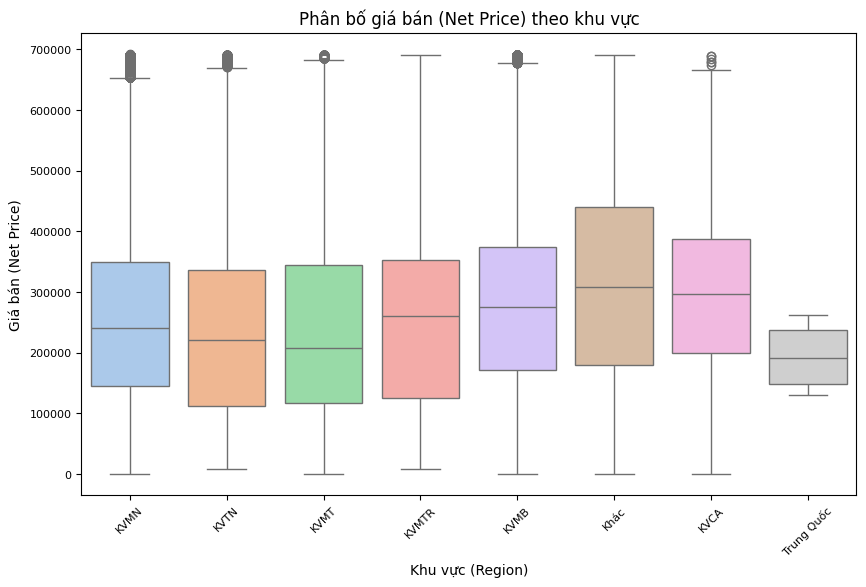

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-pastel')
plt.figure(figsize=(10,6))

sns.boxplot(
    data=df_clean,
    x='region',
    y='net_price',
    palette=sns.color_palette('pastel')
)

plt.title('Phân bố giá bán (Net Price) theo khu vực', fontsize=12)
plt.xlabel('Khu vực (Region)', fontsize=10)
plt.ylabel('Giá bán (Net Price)', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)
plt.show()


### Phân bố số lượng bán ra (sold_quantity):

C:\Users\Admin\AppData\Local\Temp\ipykernel_12296\2053609638.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\Admin\AppData\Local\Temp\ipykernel_12296\2053609638.py:2: UserWarning: The palette list has more values (10) than needed (8), which may not be intended.
  sns.boxplot(


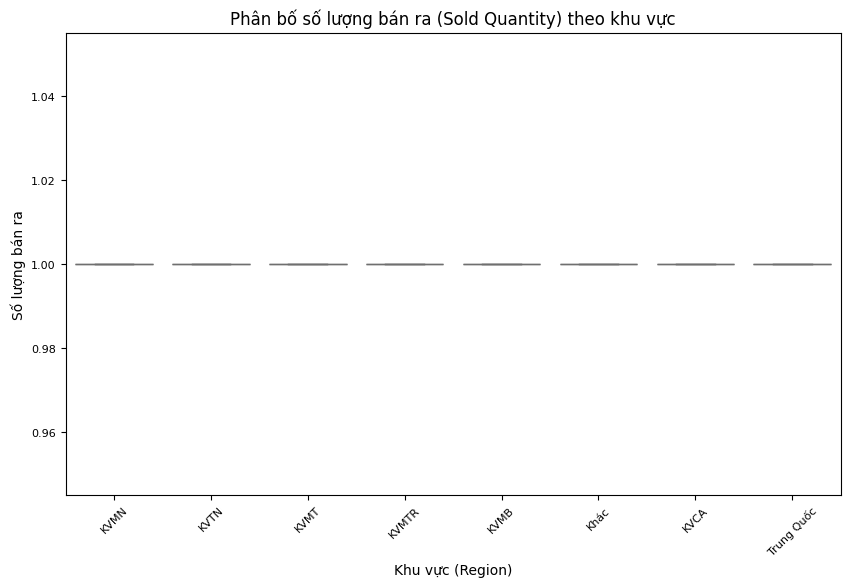

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(
    data=df_clean,
    x='region',
    y='sold_quantity',
    palette=sns.color_palette('pastel')
)
plt.title('Phân bố số lượng bán ra (Sold Quantity) theo khu vực', fontsize=12)
plt.xlabel('Khu vực (Region)', fontsize=10)
plt.ylabel('Số lượng bán ra', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)
plt.show()

## Analysis Questions

Here, we try to gather all the possible analysis questions and insights into the data we want. I have gathered a few questions, whose answers I’d like to know. I have broadly classified the questions into 4 categories.

I. Phân tích mô tả (Descriptive Analysis)

1.1. Giá bán trung bình (net_price) và giá niêm yết (listing_price) của các sản phẩm.

1.2. Mức chiết khấu trung bình (discount_rate) theo nhóm sản phẩm.

1.4. Số lượng sản phẩm bán được trung bình (sold_quantity) trên mỗi SKU.

II. Phân tích theo loại sản phẩm (SKU/Product Analysis)

2.1. Top 10 nhóm sản phẩm (product_group) có doanh thu cao nhất.

2.2. So sánh lợi nhuận trung bình (profit) giữa các thương hiệu (brand_name).

2.3. Phân bố giá niêm yết (listing_price) theo nhóm giá (price_group).



III. Phân tích theo thời gian (Time Series Analysis)

3.1. Xu hướng doanh thu (revenue) theo thời gian (tuần/tháng).

3.2. Mức chiết khấu trung bình thay đổi như thế nào qua các tháng.

3.3. Doanh số bán trung bình (sold_quantity) theo mùa hoặc quý.


IV. Phân tích theo khu vực (Regional Analysis)

4.1. Top khu vực (region) có doanh thu cao nhất.

4.2. So sánh lợi nhuận trung bình (profit) giữa các khu vực.

4.3. Ảnh hưởng của loại cửa hàng (store_type) đến doanh số.



## Descriptive Analysis

1.1. Giá bán trung bình (net_price) và giá niêm yết (listing_price) của các sản phẩm

In [ ]:
#Calculate the mean of the ‘price’ column
average_net_price = df['net_price'].mean()
print(f'Average Net Price: ${average_net_price:.2f}')

average_listing_price = df['listing_price'].mean()
print(f'Average Listing Price: ${average_listing_price:.2f}')


Average Net Price: $399331.25
Average Listing Price: $332553.57


In [ ]:
df.groupby('product_group')['discount_rate'].mean().sort_values(ascending=False)


In [ ]:
df['gross_margin'].mean()

In [ ]:
df.groupby('product_id')['sold_quantity'].mean().head(10)

In [ ]:
# VẼ BIỂU ĐỒ SCATTER PLOT
sns.scatterplot(x='net_price', y='sold_quantity', data=sales_data, alpha=0.6)
plt.title("Figure 4.11. Relationship between Price and Sold Quantity")
plt.xlabel("Net Price")
plt.ylabel("Sold Quantity")
plt.show()


Phân phối của các biến chính (Distribution of Key Features)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sales_data['sold_quantity'].hist(bins=50, color='skyblue', edgecolor='black')
plt.title("Figure 4.8. Distribution of Sold Quantity")
plt.xlabel("Số lượng bán (sold_quantity)")
plt.ylabel("Tần suất xuất hiện")
plt.show()


## Phân tích theo loại sản phẩm

In [ ]:
# 2.1 Top 10 nhóm sản phẩm doanh thu cao nhất
df.groupby('product_group')['revenue'].sum().sort_values(ascending=False).head(10)

# 2.2 Lợi nhuận trung bình theo thương hiệu
df.groupby('brand_name')['profit'].mean().sort_values(ascending=False).head(10)

# 2.3 Phân bố giá niêm yết theo nhóm giá
df.groupby('price_group')['listing_price'].mean().sort_values()

# 2.4 Chiết khấu trung bình theo nhóm sản phẩm
df.groupby('product_group')['discount_rate'].mean().sort_values(ascending=False)


## Phân tích theo thời gian

In [ ]:
# 3.1 Xu hướng doanh thu theo tháng
df.groupby('month')['revenue'].sum().plot(kind='line', title='Doanh thu theo tháng')

# 3.2 Chiết khấu trung bình theo tháng
df.groupby('month')['discount_rate'].mean().plot(kind='line', title='Chiết khấu trung bình theo tháng')

# 3.3 Số lượng bán trung bình theo tháng
df.groupby('month')['sold_quantity'].mean()

# 3.4 So sánh giá trung bình giữa các tháng
df.groupby('month')['net_price'].mean()


## Phân tích theo khu vực

In [ ]:
# 4.1 Top khu vực doanh thu cao nhất
df.groupby('region')['revenue'].sum().sort_values(ascending=False).head(10)

# 4.2 Lợi nhuận trung bình theo khu vực
df.groupby('region')['profit'].mean().sort_values(ascending=False)

# 4.3 Doanh số trung bình theo loại cửa hàng
df.groupby('store_type')['sold_quantity'].mean()

# 4.4 So sánh B2B vs B2C
df.groupby('b2b_b2c')[['revenue', 'discount_rate']].mean()


🔹 Bước 2 – Áp dụng Log Transformation

In [ ]:
import numpy as np

sales_data['log_sold_quantity'] = np.log1p(sales_data['sold_quantity'])
sns.histplot(sales_data['log_sold_quantity'], bins=40, color='orange')
plt.title("Figure 4.9. Distribution after Log Transformation")
plt.xlabel("log(1 + sold_quantity)")
plt.ylabel("Frequency")
plt.show()


Bước 3 – Tương quan giữa các biến (Correlation Analysis)
Bước 4 - Phân tích mối quan hệ giữa Giá và Doanh số (Price vs Sales)
Bước 5 – Sản phẩm bán chạy nhất (Top Selling Products)
Bước 6 – Phân tích doanh số theo khu vực (Regional Sales Analysis)
Bước 7 – Doanh số theo kênh bán hàng (Channel Analysis)
Bước 8 – Phân tích xu hướng theo thời gian (Time Series Trends)

In [ ]:
3
corr = sales_data[['sold_quantity', 'net_price', 'cost_price']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Figure 4.10. Correlation Matrix between Key Variables")
plt.show()




plt.figure(figsize=(10,6))
sns.heatmap(merged_df.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm")
plt.title("Figure 4.8. Correlation Matrix of Numeric Variables")
plt.show()


In [ ]:
5
top_products = sales_data.groupby('product_id')['sold_quantity'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', color='teal', figsize=(10,4))
plt.title("Figure 4.12. Top 10 Best-Selling Products")
plt.ylabel("Total Quantity Sold")
plt.show()


In [ ]:
6
region_sales = sales_data.groupby('branch_id')['sold_quantity'].sum().sort_values(ascending=False)
region_sales.plot(kind='bar', color='slateblue', figsize=(10,4))
plt.title("Figure 4.13. Total Sales Quantity by Branch/Region")
plt.ylabel("Total Sold Quantity")
plt.show()


In [ ]:
7
channel_sales = sales_data.groupby('channel_id')['sold_quantity'].sum().sort_values(ascending=False)
sns.barplot(x=channel_sales.index, y=channel_sales.values, palette='Set2')
plt.title("Figure 4.14. Total Sales by Channel Type")
plt.ylabel("Quantity Sold")
plt.xlabel("Channel ID")
plt.show()


In [ ]:
8
weekly_sales = sales_data.groupby('week')['sold_quantity'].sum()
plt.figure(figsize=(12,5))
plt.plot(weekly_sales.index, weekly_sales.values, marker='o', color='tomato')
plt.title("Figure 4.15. Weekly Sales Trend (2022–2023)")
plt.xlabel("Week")
plt.ylabel("Total Sold Quantity")
plt.grid(True)
plt.show()


Descriptive data
1.1 Doanh thu trung bình theo tháng là bao nhiêu?
→ (Trả lời bằng biểu đồ đường thể hiện xu hướng doanh thu trung bình hàng tháng.)

1.2 Giá bán trung bình của các sản phẩm là bao nhiêu, và mức giá này khác nhau như thế nào giữa các nhóm sản phẩm (product_group)?
→ (Trả lời bằng boxplot hoặc bar chart phân nhóm theo product_group.)

1.3 Tổng doanh thu của từng khu vực (region) chiếm tỷ trọng bao nhiêu trong tổng doanh thu toàn hệ thống?
→ (Trả lời bằng biểu đồ tròn Pie Chart thể hiện phần trăm doanh thu theo khu vực.)

In [ ]:
# 1. Doanh thu trung bình theo tháng
avg_month_sales = merged_df.groupby('YearMonth')['total_sales'].mean()
avg_month_sales.plot(kind='line', figsize=(8,4))
plt.title("Figure 4.9. Average Monthly Sales Trend")
plt.xlabel("Year-Month")
plt.ylabel("Average Sales")
plt.show()

# 2. Tổng doanh thu theo khu vực
region_sales = merged_df.groupby('region')['total_sales'].sum().sort_values(ascending=False)
region_sales.plot(kind='bar', figsize=(8,4))
plt.title("Figure 4.10. Total Sales by Region")
plt.ylabel("Total Sales")
plt.show()

# 3. Phân bố giá bán theo nhóm sản phẩm
sns.boxplot(x='product_group', y='net_price', data=merged_df)
plt.title("Figure 4.11. Price Distribution by Product Group")
plt.show()


Phân tích theo Thời gian (Time Series)
2.1 Doanh thu hàng tuần có xu hướng tăng hay giảm trong giai đoạn 2022–2023?
→ (Vẽ biểu đồ đường thể hiện biến động tổng doanh thu theo tuần hoặc theo tháng.)

2.2 Mức tăng trưởng doanh thu giữa các tuần như thế nào, có tuần nào tăng đột biến hoặc giảm mạnh không?
→ (Vẽ biểu đồ đường thể hiện phần trăm tăng trưởng tuần kế tiếp.)

2.3 Có dấu hiệu mùa vụ (seasonal trend) trong hoạt động bán hàng không? Ví dụ: doanh thu tăng mạnh ở mùa lễ, Tết, hoặc giảm ở thời điểm thấp điểm trong năm.
→ (Vẽ biểu đồ Seasonal Decomposition hoặc line plot nhóm theo tháng.)

In [ ]:
# 1. Xu hướng doanh thu theo tuần
weekly_sales = merged_df.groupby('YearWeek')['total_sales'].sum()
weekly_sales.plot(figsize=(8,4))
plt.title("Figure 4.12. Weekly Sales Trend")
plt.xlabel("Week")
plt.ylabel("Total Sales")
plt.show()

# 2. Tăng trưởng doanh thu tuần kế tiếp
merged_df['weekly_growth'] = merged_df['total_sales'].pct_change()
merged_df[['YearWeek','weekly_growth']].dropna().plot(x='YearWeek', y='weekly_growth', figsize=(8,4))
plt.title("Figure 4.13. Weekly Sales Growth (%)")
plt.ylabel("Growth rate")
plt.show()


Phân tích theo Sản phẩm / SKU
.1 Những sản phẩm nào (theo mã SKU) có doanh số bán ra cao nhất trong giai đoạn nghiên cứu?
→ (Vẽ bar chart Top 10 sản phẩm bán chạy nhất.)

3.2 Nhóm sản phẩm nào (giày, dép, túi xách, phụ kiện, v.v.) mang lại doanh thu trung bình cao nhất?
→ (Vẽ bar chart thể hiện doanh thu trung bình theo nhóm sản phẩm.)

3.3 Tồn kho trung bình của các nhóm sản phẩm có sự chênh lệch đáng kể không, nhóm nào tồn kho cao nhất?
→ (Vẽ bar chart thể hiện số lượng tồn kho trung bình theo product_group.)

In [ ]:
# 1. Top 10 sản phẩm bán chạy
top_sku = merged_df.groupby('product_id')['sold_quantity'].sum().nlargest(10)
top_sku.plot(kind='bar', figsize=(8,4))
plt.title("Figure 4.14. Top 10 Best-Selling SKUs")
plt.ylabel("Quantity Sold")
plt.show()

# 2. So sánh giá trung bình giữa nhóm sản phẩm
sns.barplot(x='product_group', y='net_price', data=merged_df)
plt.title("Figure 4.15. Average Price by Product Group")
plt.show()

# 3. Tồn kho trung bình theo nhóm hàng
inventory_avg = merged_df.groupby('product_group')['quantity'].mean()
inventory_avg.plot(kind='bar', figsize=(8,4))
plt.title("Figure 4.16. Average Inventory Quantity by Product Group")
plt.show()


Phân tích theo Khu vực (Regional Analysis)
4.1 Khu vực nào có tổng doanh thu cao nhất và thấp nhất?
→ (Vẽ bar chart thể hiện tổng doanh thu theo khu vực.)

4.2 Tồn kho trung bình giữa các khu vực khác nhau như thế nào?
→ (Vẽ boxplot thể hiện phân bố tồn kho theo khu vực.)

4.3 Doanh thu giữa các khu vực có tương quan với mức độ đô thị hóa (urbanization) không?
→ (Có thể sử dụng scatter plot hoặc heatmap để thể hiện mối liên hệ giữa urbanization và tổng doanh thu.

In [ ]:
# 1. Doanh thu theo vùng và tháng
pivot_region = pd.pivot_table(merged_df, values='total_sales', index='region', columns='YearMonth', aggfunc='sum')
sns.heatmap(pivot_region, cmap="YlGnBu")
plt.title("Figure 4.17. Heatmap: Sales by Region and Month")
plt.show()

# 2. Trung bình tồn kho theo vùng
sns.boxplot(x='region', y='quantity', data=merged_df)
plt.title("Figure 4.18. Inventory Distribution by Region")
plt.show()

# 3. Tỷ trọng doanh thu theo vùng
region_ratio = merged_df.groupby('region')['total_sales'].sum()
region_ratio.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))
plt.title("Figure 4.19. Sales Share by Region")
plt.ylabel("")
plt.show()
